In [2]:
import pandas as pd
sentdf = pd.read_pickle('sentdf.pkl')

sentdf

,product_parent,discipline,review_body,review_date,star_rating,sentiment
0,598678717,psychology,Review based on a cursory examination by Unive...,2005-10-14,4,4
1,697870179,economy,ALthough he is correct that the IMF and World ...,2005-10-14,3,3
2,339619920,politics,While I don't always agree with his TV analysi...,2005-10-14,2,2
3,733918058,economy,Since the 1992 presidential run of H. Ross Per...,2005-10-14,4,4
4,82232603,economy,In terms of programming concepts and OOP desig...,2005-10-14,5,3
...,...,...,...,...,...,...
42466,218513537,politics,This book captures the reality of the American...,1996-05-19,5,5
42467,426467516,psychology,"Based on anecdotal evidence, intuition, tradit...",1996-05-15,5,4
42468,232298383,politics,An excellent monograph by an outstanding scholar,1995-11-19,5,5
42469,323732312,politics,The authors write with clarity in a field whic...,1995-09-14,4,4


In [3]:
topic = sentdf[['review_body', 'sentiment' , 'product_parent', 'discipline']]

# topic = topic.set_index('review_body')

topic

,review_body,sentiment,product_parent,discipline
0,Review based on a cursory examination by Unive...,4,598678717,psychology
1,ALthough he is correct that the IMF and World ...,3,697870179,economy
2,While I don't always agree with his TV analysi...,2,339619920,politics
3,Since the 1992 presidential run of H. Ross Per...,4,733918058,economy
4,In terms of programming concepts and OOP desig...,3,82232603,economy
...,...,...,...,...
42466,This book captures the reality of the American...,5,218513537,politics
42467,"Based on anecdotal evidence, intuition, tradit...",4,426467516,psychology
42468,An excellent monograph by an outstanding scholar,5,232298383,politics
42469,The authors write with clarity in a field whic...,4,323732312,politics


In [37]:
topic

,review_body,sentiment,product_parent,discipline
0,Review based on a cursory examination by Unive...,4,598678717,psychology
1,ALthough he is correct that the IMF and World ...,3,697870179,economy
2,While I don't always agree with his TV analysi...,2,339619920,politics
3,Since the 1992 presidential run of H. Ross Per...,4,733918058,economy
4,In terms of programming concepts and OOP desig...,3,82232603,economy
...,...,...,...,...
42466,This book captures the reality of the American...,5,218513537,politics
42467,"Based on anecdotal evidence, intuition, tradit...",4,426467516,psychology
42468,An excellent monograph by an outstanding scholar,5,232298383,politics
42469,The authors write with clarity in a field whic...,4,323732312,politics


In [6]:
# LDA WITH GENSIM

!pip install gensim
import pickle
import numpy as np
import pandas as pd
import re
import string
from gensim.parsing.preprocessing import remove_stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from bs4 import BeautifulSoup
!pip install pyLDAvis
import spacy
nlp = spacy.load("en_core_web_sm",disable=['parser', 'ner'])
from pprint import pprint# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel# spaCy for preprocessing
import spacy# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
nlp.max_length = 45553783
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 're', 'br'])


nlp = spacy.load("en_core_web_sm",disable=['parser', 'ner'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ibrah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Convert to list 
data = topic.review_body.tolist()

In [9]:
# Tokenize words and cleanup the text
def sent_to_words(sentences):
  for sentence in sentences:
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))            #deacc=True removes punctuations
data_words = list(sent_to_words(data))
print(data_words[:1])

[['review', 'based', 'on', 'cursory', 'examination', 'by', 'university', 'of', 'phoenix', 'students', 'in', 'philosophy', 'br', 'we', 'have', 'found', 'the', 'book', 'to', 'be', 'well', 'organized', 'and', 'detailed', 'the', 'structure', 'placed', 'the', 'information', 'in', 'an', 'easy', 'to', 'read', 'and', 'presentable', 'manner', 'br', 'the', 'use', 'of', 'strong', 'and', 'sound', 'proofs', 'by', 'experiment', 'and', 'examples', 'supported', 'the', 'overall', 'logic', 'of', 'reasoning', 'in', 'clear', 'and', 'concise', 'manner', 'br', 'we', 'have', 'found', 'the', 'book', 'to', 'be', 'well', 'thought', 'out', 'and', 'laid', 'out', 'so', 'the', 'reader', 'can', 'learn', 'and', 'follow', 'what', 'is', 'being', 'explained', 'br']]


In [10]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)
# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['review', 'based', 'on', 'cursory', 'examination', 'by', 'university', 'of', 'phoenix', 'students', 'in', 'philosophy', 'br', 'we', 'have', 'found', 'the', 'book', 'to', 'be', 'well', 'organized', 'and', 'detailed', 'the', 'structure', 'placed', 'the', 'information', 'in', 'an', 'easy', 'to', 'read', 'and', 'presentable', 'manner', 'br', 'the', 'use', 'of', 'strong', 'and', 'sound', 'proofs', 'by', 'experiment', 'and', 'examples', 'supported', 'the', 'overall', 'logic', 'of', 'reasoning', 'in', 'clear', 'and', 'concise', 'manner', 'br', 'we', 'have', 'found', 'the', 'book', 'to', 'be', 'well', 'thought', 'out', 'and', 'laid', 'out', 'so', 'the', 'reader', 'can', 'learn', 'and', 'follow', 'what', 'is', 'being', 'explained', 'br']


In [11]:
# Define function for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [12]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)


# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['review', 'base', 'cursory', 'examination', 'university', 'phoenix', 'student', 'philosophy', 'find', 'book', 'well', 'organize', 'detailed', 'structure', 'place', 'information', 'easy', 'read', 'presentable', 'manner', 'use', 'strong', 'sound', 'proof', 'experiment', 'example', 'support', 'overall', 'logic', 'reason', 'clear', 'manner', 'find', 'book', 'well', 'think', 'lay', 'reader', 'learn', 'follow', 'explain']]


In [13]:
# Create Dictionary 
id2word = corpora.Dictionary(data_lemmatized)  
# Create Corpus 
texts = data_lemmatized  
# Term Document Frequency 
corpus = [id2word.doc2bow(text) for text in texts]  
# View 
print(corpus[:1])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2)]]


In [85]:
# 20 topics coherence score:0.5082478433347919
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=18, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=1000,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [95]:
# Print the keyword of topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.092*"book" + 0.031*"read" + 0.022*"get" + 0.022*"good" + 0.015*"make" + '
  '0.014*"want" + 0.014*"way" + 0.014*"life" + 0.013*"know" + 0.013*"help"'),
 (1,
  '0.154*"woman" + 0.060*"man" + 0.055*"gender" + 0.030*"male" + 0.027*"sex" + '
  '0.025*"feminist" + 0.019*"female" + 0.016*"gay" + 0.015*"sexual" + '
  '0.012*"food"'),
 (2,
  '0.058*"model" + 0.036*"theory" + 0.018*"analysis" + 0.016*"mathematical" + '
  '0.015*"finance" + 0.014*"econometric" + 0.014*"datum" + 0.013*"math" + '
  '0.011*"mathematic" + 0.011*"derivative"'),
 (3,
  '0.064*"political" + 0.035*"politic" + 0.021*"government" + 0.020*"american" '
  '+ 0.018*"public" + 0.013*"power" + 0.013*"state" + 0.013*"war" + '
  '0.012*"medium" + 0.011*"country"'),
 (4,
  '0.070*"book" + 0.029*"read" + 0.028*"write" + 0.026*"author" + 0.023*"well" '
  '+ 0.016*"reader" + 0.012*"find" + 0.012*"work" + 0.010*"interesting" + '
  '0.009*"many"'),
 (5,
  '0.076*"child" + 0.065*"law" + 0.034*"school" + 0.029*"parent" + '
  '0

In [87]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.656952057535717

Coherence Score:  0.5167209542961673


In [88]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

C:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.279032 -0.123586       1        1  17.792829
4      0.297308 -0.137848       2        1  16.255798
15     0.227187  0.064956       3        1  16.005664
14     0.241586 -0.083525       4        1  15.703449
7      0.242196 -0.046278       5        1  11.199015
3      0.066558  0.153463       6        1   6.172139
17     0.023779  0.266107       7        1   2.913384
11     0.014631  0.179469       8        1   2.603916
6     -0.056830  0.155967       9        1   2.044734
2      0.015484  0.071914      10        1   1.769410
13    -0.071617 -0.160332      11        1   1.559068
12    -0.104699 -0.051281      12        1   1.437462
1     -0.153486 -0.133322      13        1   1.293633
10    -0.154386  0.149305      14        1   1.078030
5     -0.174332 -0.073100      15        1   1.067530
8     -0.217932 -0.072849      16        1   0.490947
16    -0.232762 -0.072726      17        1   0.358036
9     -0.241717 -0.086332      18        1   0.254956, topic_info=           Term           Freq          Total Category  logprob  loglift
1          book  109636.000000  109636.000000  Default  30.0000  30.0000
48     economic   14026.000000   14026.000000  Default  29.0000  29.0000
65    political   13954.000000   13954.000000  Default  28.0000  28.0000
24         read   34311.000000   34311.000000  Default  27.0000  27.0000
448        life   11115.000000   11115.000000  Default  26.0000  26.0000
...         ...            ...            ...      ...      ...      ...
5769    suffice      49.442151      50.729767  Topic18  -5.1498   5.9461
5916      relax      48.593995      49.881611  Topic18  -5.1671   5.9457
1641      brand     194.810669     236.691412  Topic18  -3.7786   5.7771
1737   platform     103.484833     162.673676  Topic18  -4.4112   5.5195
1505     safety      69.288365     135.897348  Topic18  -4.8124   5.2982

[1035 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3904     12  0.977564         _
3904     17  0.018890         _
4014     15  0.996840  abortion
1166      2  0.799498  academic
1166      3  0.185397  academic
...     ...       ...       ...
1163      6  0.084064     young
1163     13  0.200187     young
1163     15  0.235808     young
2170      6  0.087165     youth
2170     15  0.909549     youth

[2032 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 16, 15, 8, 4, 18, 12, 7, 3, 14, 13, 2, 11, 6, 9, 17, 10])

<AxesSubplot:xlabel='Dominant_Topic', ylabel='count'>

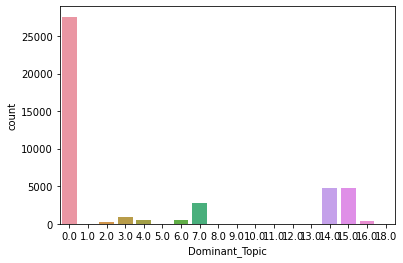

In [89]:

# lda_model

# lda_model.print_topics()

# type(texts)

# topic.rename(columns={'texts': 'Text'}, inplace=True)
# topic

# lda_model.get_document_topics
# lda_model.get_document_topics(corpus, per_word_topics=True)

import seaborn as sns
import matplotlib.pyplot as plt

# count plot on single categorical variable
sns.countplot(x ='Dominant_Topic', data = df_dominant_topic)

In [90]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(lda_model[corpus]):
        row = row_list[0] if lda_model.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = lda_model.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,7.0,0.3387,"book, use, chapter, student, text, information...","[review, base, cursory, examination, universit..."
1,1,15.0,0.2844,"social, work, society, theory, culture, study,...","[correct, play, role, also, advocate, reform, ..."
2,2,14.0,0.4312,"people, say, make, even, fact, see, believe, r...","[always, agree, tv, analysis, enjoy, book, how..."
3,3,17.0,0.2147,"economy, economic, world, global, policy, coun...","[presidential, run, ross_perot, grow, awarenes..."
4,4,2.0,0.2886,"model, theory, analysis, mathematical, finance...","[term, programming, concept, oop, engineering,..."
5,5,14.0,0.3247,"people, say, make, even, fact, see, believe, r...","[fiction, writer, footstep, clive, cusler, all..."
6,6,0.0,0.2137,"book, read, get, good, make, want, way, life, ...","[reasonably, speak, unreasonable, woman, inspi..."
7,7,14.0,0.2138,"people, say, make, even, fact, see, believe, r...","[shoot, disease, fool, systematically, logical..."
8,8,7.0,0.2719,"book, use, chapter, student, text, information...","[interesting, book, beginner, need, provide, e..."
9,9,0.0,0.1898,"book, read, get, good, make, want, way, life, ...","[fascinated, insightful, book, coin, phrase, c..."


In [91]:
# topic['row_num'] = np.arange(len(topic))
# topic.rename(columns={'row_num': 'Document_No'}, inplace=True)
topic

# topic[100:110]

,review_body,sentiment,product_parent,discipline,Document_No
0,Review based on a cursory examination by Unive...,4,598678717,psychology,0
1,ALthough he is correct that the IMF and World ...,3,697870179,economy,1
2,While I don't always agree with his TV analysi...,2,339619920,politics,2
3,Since the 1992 presidential run of H. Ross Per...,4,733918058,economy,3
4,In terms of programming concepts and OOP desig...,3,82232603,economy,4
...,...,...,...,...,...
42466,This book captures the reality of the American...,5,218513537,politics,42465
42467,"Based on anecdotal evidence, intuition, tradit...",4,426467516,psychology,42466
42468,An excellent monograph by an outstanding scholar,5,232298383,politics,42467
42469,The authors write with clarity in a field whic...,4,323732312,politics,42468


In [92]:
# df_dominant_topic[100:110]

merged = topic.merge(df_dominant_topic, on='Document_No')

# del merged["Text_y"]

merged

merged.to_pickle('topics_per_doc.pkl')

*** Another Trial For LDA ***

In [60]:
# !pip install gensim==3.8.3
# from gensim.models.wrappers import LdaMallet
import os
from gensim.models.wrappers import LdaMallet
# mallet-2.0.8 (file://HALIL/mallet-2.0.8)

os.environ.update({'MALLET_HOME':r'C:/new_mallet/mallet-2.0.8/'})
mallet_path = 'C:/new_mallet/mallet-2.0.8/bin/mallet' # update this path

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word)

In [1]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=texts, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

In [62]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [63]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=50, step=6)

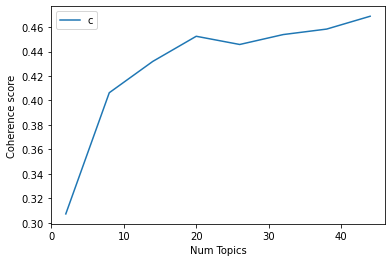

In [65]:
# Show graph
limit=50; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

IndexError: list index out of range

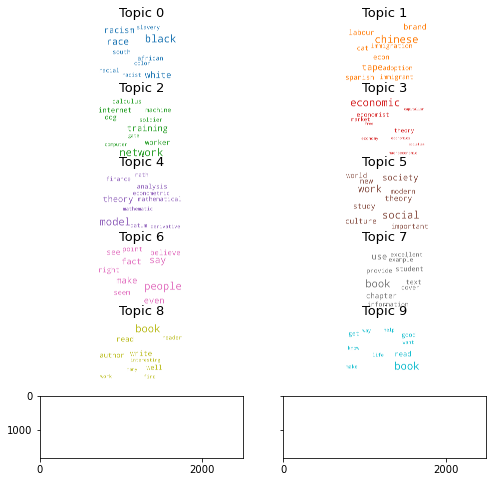

In [114]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=20,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(6, 2, figsize=(8,8), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=13))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

C:\Users\ibrah\AppData\Local\Temp/ipykernel_9592/1923861260.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


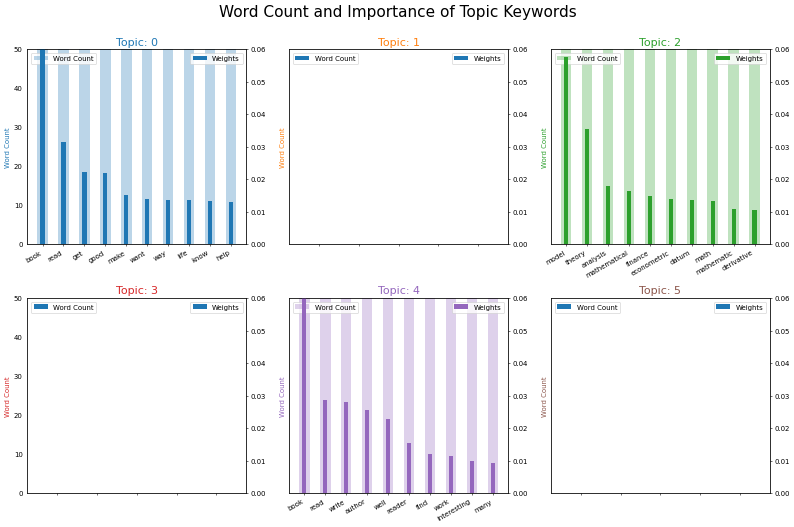

In [108]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 3, figsize=(16,10), sharey=True, dpi=50)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.060); ax.set_ylim(0, 50)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()